In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import pickle
import warnings
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.random.seed(42)

print("✅ All libraries imported successfully!")
print(f"📁 Working Directory: {os.getcwd()}")


✅ All libraries imported successfully!
📁 Working Directory: /Users/nishalsave/Desktop/Seasonal-pollution-episode-prediction


In [12]:
# Load the trained model
model_path = 'models/best_model.pkl'

try:
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    print("✅ Model loaded successfully!")
    print("="*60)
    print(f"📂 Model Path: {model_path}")
    print(f"📊 Model Type: {type(model).__name__}")
    print("="*60)
except FileNotFoundError:
    print(f"❌ Error: Model file not found at {model_path}")
    print("Please ensure Part 2 (Model Training) has been executed.")


✅ Model loaded successfully!
📂 Model Path: models/best_model.pkl
📊 Model Type: DecisionTreeClassifier


In [13]:
# Load model metadata
model_info_path = 'models/model_info.pkl'

try:
    with open(model_info_path, 'rb') as file:
        model_info = pickle.load(file)
    
    print("📋 MODEL INFORMATION")
    print("="*60)
    print(f"Model Type: {model_info['model_type']}")
    print(f"Number of Features: {model_info['n_features']}")
    print(f"Target Variable: {model_info['target_variable']}")
    print("\n🔧 Hyperparameters:")
    for param, value in model_info['hyperparameters'].items():
        print(f"   • {param}: {value}")
    print("\n📈 Performance Metrics:")
    for metric, value in model_info['performance_metrics'].items():
        print(f"   • {metric}: {value}")
    print("="*60)
    
    # Store feature names for later use
    FEATURE_NAMES = model_info['feature_names']
    
except FileNotFoundError:
    print("⚠️ Model info file not found. Using default feature names.")
    FEATURE_NAMES = [
        'month', 'temperature_c', 'humidity_pct', 'wind_speed_kmh',
        'wind_direction_deg', 'fire_count_punjab', 'fire_count_haryana',
        'days_from_diwali', 'previous_day_aqi', 'consecutive_poor_days',
        'weather_dispersion_index', 'stubble_impact_score', 'pollution_momentum',
        'diwali_impact_zone', 'inversion_risk'
    ]


📋 MODEL INFORMATION
Model Type: DecisionTreeClassifier
Number of Features: 15
Target Variable: severe_episode

🔧 Hyperparameters:
   • max_depth: 7
   • min_samples_split: 30
   • min_samples_leaf: 5
   • random_state: 42

📈 Performance Metrics:
   • test_accuracy: 0.5500
   • recall_severe: 56%
   • precision_severe: 50%
   • f1_score: 0.5263
   • auc: 0.5215


In [14]:
# Load the sample dataset
data_path = 'data/final/pollution_dataset_with_features.csv'

try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully!")
    print("="*60)
    print(f"📂 Data Path: {data_path}")
    print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"🏙️  Cities: {df['city'].unique().tolist()}")
    print(f"📅 Date Range: {df['date'].min()} to {df['date'].max()}")
    print("="*60)
except FileNotFoundError:
    print(f"❌ Error: Dataset not found at {data_path}")
    print("Please ensure Part 1 (Data Collection) has been executed.")


✅ Dataset loaded successfully!
📂 Data Path: data/final/pollution_dataset_with_features.csv
📊 Dataset Shape: 200 rows × 19 columns
🏙️  Cities: ['Chandigarh', 'Delhi', 'Lucknow', 'Jaipur', 'Gurugram', 'Patna', 'Amritsar']
📅 Date Range: 2019-10-01 to 2024-02-26


In [15]:
# Display dataset overview
print("📊 DATASET OVERVIEW")
print("="*60)
print("\n🔢 Column Names and Data Types:")
print("-"*60)
for col in df.columns:
    print(f"   • {col}: {df[col].dtype}")

print("\n🎯 Target Variable Distribution:")
print("-"*60)
target_dist = df['severe_episode'].value_counts()
print(f"   • Normal Days (0): {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
print(f"   • Severe Episodes (1): {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")
print("="*60)


📊 DATASET OVERVIEW

🔢 Column Names and Data Types:
------------------------------------------------------------
   • record_id: int64
   • city: object
   • date: object
   • month: int64
   • temperature_c: float64
   • humidity_pct: float64
   • wind_speed_kmh: float64
   • wind_direction_deg: float64
   • fire_count_punjab: int64
   • fire_count_haryana: int64
   • days_from_diwali: int64
   • previous_day_aqi: int64
   • consecutive_poor_days: int64
   • severe_episode: int64
   • weather_dispersion_index: float64
   • stubble_impact_score: int64
   • pollution_momentum: int64
   • diwali_impact_zone: int64
   • inversion_risk: int64

🎯 Target Variable Distribution:
------------------------------------------------------------
   • Normal Days (0): 111 (55.5%)
   • Severe Episodes (1): 89 (44.5%)


In [16]:
# Display first 10 rows of the dataset
print("📋 SAMPLE DATA (First 10 Rows)")
print("="*100)
display_cols = ['record_id', 'city', 'date', 'temperature_c', 'humidity_pct', 
                'wind_speed_kmh', 'fire_count_punjab', 'previous_day_aqi', 'severe_episode']
print(df[display_cols].head(10).to_string(index=False))
print("="*100)


📋 SAMPLE DATA (First 10 Rows)
 record_id       city       date  temperature_c  humidity_pct  wind_speed_kmh  fire_count_punjab  previous_day_aqi  severe_episode
         1 Chandigarh 2021-11-09           20.4          98.0             9.2               1502               263               1
         2      Delhi 2022-01-03            3.0          65.6            11.0                112                85               1
         3    Lucknow 2021-01-24            4.1          59.2             1.0                 70               292               0
         4     Jaipur 2022-01-09            9.8          84.1            16.0                 80               343               0
         5   Gurugram 2021-02-24           12.8          87.5            15.5                 84               336               0
         6 Chandigarh 2021-11-05           15.1          48.7            14.9                919               287               1
         7      Patna 2021-02-19           23.3      

In [17]:
# Prepare feature matrix
X = df[FEATURE_NAMES].copy()
y_actual = df['severe_episode'].copy()

print("✅ Data prepared for predictions!")
print("="*60)
print(f"📊 Feature Matrix Shape: {X.shape}")
print(f"🎯 Target Vector Shape: {y_actual.shape}")
print("\n📋 Features Used for Prediction:")
print("-"*60)
for i, feature in enumerate(FEATURE_NAMES, 1):
    print(f"   {i:2d}. {feature}")
print("="*60)


✅ Data prepared for predictions!
📊 Feature Matrix Shape: (200, 15)
🎯 Target Vector Shape: (200,)

📋 Features Used for Prediction:
------------------------------------------------------------
    1. month
    2. temperature_c
    3. humidity_pct
    4. wind_speed_kmh
    5. wind_direction_deg
    6. fire_count_punjab
    7. fire_count_haryana
    8. days_from_diwali
    9. previous_day_aqi
   10. consecutive_poor_days
   11. weather_dispersion_index
   12. stubble_impact_score
   13. pollution_momentum
   14. diwali_impact_zone
   15. inversion_risk


In [18]:
# Run predictions
print("🔮 RUNNING PREDICTIONS...")
print("="*60)

# Get predictions and probabilities
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

print(f"✅ Predictions completed for {len(y_pred)} samples!")
print("\n📊 Prediction Summary:")
print("-"*60)
pred_counts = pd.Series(y_pred).value_counts().sort_index()
print(f"   • Predicted Normal (0): {pred_counts[0]} samples")
print(f"   • Predicted Severe (1): {pred_counts[1]} samples")
print("="*60)


🔮 RUNNING PREDICTIONS...
✅ Predictions completed for 200 samples!

📊 Prediction Summary:
------------------------------------------------------------
   • Predicted Normal (0): 102 samples
   • Predicted Severe (1): 98 samples


In [19]:
# Create results dataframe with predictions
results_df = df[['record_id', 'city', 'date', 'month', 'temperature_c', 
                 'humidity_pct', 'wind_speed_kmh', 'fire_count_punjab', 
                 'previous_day_aqi', 'severe_episode']].copy()

results_df['predicted'] = y_pred
results_df['probability_severe'] = y_proba[:, 1]
results_df['correct'] = (results_df['severe_episode'] == results_df['predicted']).astype(int)

# Add prediction label
results_df['prediction_label'] = results_df['predicted'].map({0: 'Normal', 1: 'Severe'})
results_df['actual_label'] = results_df['severe_episode'].map({0: 'Normal', 1: 'Severe'})

print("📋 PREDICTION RESULTS (First 20 Samples)")
print("="*120)
display_results = results_df[['record_id', 'city', 'date', 'actual_label', 
                               'prediction_label', 'probability_severe', 'correct']].head(20)
print(display_results.to_string(index=False))
print("="*120)


📋 PREDICTION RESULTS (First 20 Samples)
 record_id       city       date actual_label prediction_label  probability_severe  correct
         1 Chandigarh 2021-11-09       Severe           Severe            0.833333        1
         2      Delhi 2022-01-03       Severe           Severe            0.904762        1
         3    Lucknow 2021-01-24       Normal           Normal            0.052632        1
         4     Jaipur 2022-01-09       Normal           Severe            0.833333        0
         5   Gurugram 2021-02-24       Normal           Severe            0.833333        0
         6 Chandigarh 2021-11-05       Severe           Normal            0.388889        0
         7      Patna 2021-02-19       Normal           Severe            0.521739        0
         8     Jaipur 2019-11-01       Normal           Normal            0.000000        1
         9   Amritsar 2022-01-15       Severe           Normal            0.375000        0
        10    Lucknow 2019-10-01       N

In [20]:
# Calculate overall accuracy
accuracy = accuracy_score(y_actual, y_pred)

print("📈 MODEL PERFORMANCE ON SAMPLE DATA")
print("="*60)
print(f"\n🎯 Overall Accuracy: {accuracy:.2%} ({int(accuracy * len(y_actual))}/{len(y_actual)} correct)")
print("\n" + "="*60)


📈 MODEL PERFORMANCE ON SAMPLE DATA

🎯 Overall Accuracy: 72.50% (145/200 correct)



In [21]:
# Generate classification report
print("📊 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_actual, y_pred, 
                           target_names=['Normal Day', 'Severe Episode'],
                           digits=3))
print("="*60)


📊 CLASSIFICATION REPORT
                precision    recall  f1-score   support

    Normal Day      0.775     0.712     0.742       111
Severe Episode      0.673     0.742     0.706        89

      accuracy                          0.725       200
     macro avg      0.724     0.727     0.724       200
  weighted avg      0.730     0.725     0.726       200



In [23]:
# Generate and display confusion matrix
cm = confusion_matrix(y_actual, y_pred)

print("🔢 CONFUSION MATRIX ANALYSIS")
print("="*60)
print("\n              Predicted")
print("              Normal  Severe")
print(f"Actual Normal   {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"       Severe   {cm[1,0]:4d}    {cm[1,1]:4d}")
print("\n" + "-"*60)
print("\n📝 Interpretation:")
print(f"   • True Negatives (TN):  {cm[0,0]:3d} - Correctly predicted normal days")
print(f"   • False Positives (FP): {cm[0,1]:3d} - Normal days incorrectly flagged as severe")
print(f"   • False Negatives (FN): {cm[1,0]:3d} - Severe episodes missed (CRITICAL!)")
print(f"   • True Positives (TP):  {cm[1,1]:3d} - Correctly predicted severe episodes")
print("="*60)


🔢 CONFUSION MATRIX ANALYSIS

              Predicted
              Normal  Severe
Actual Normal     79      32
       Severe     23      66

------------------------------------------------------------

📝 Interpretation:
   • True Negatives (TN):   79 - Correctly predicted normal days
   • False Positives (FP):  32 - Normal days incorrectly flagged as severe
   • False Negatives (FN):  23 - Severe episodes missed (CRITICAL!)
   • True Positives (TP):   66 - Correctly predicted severe episodes


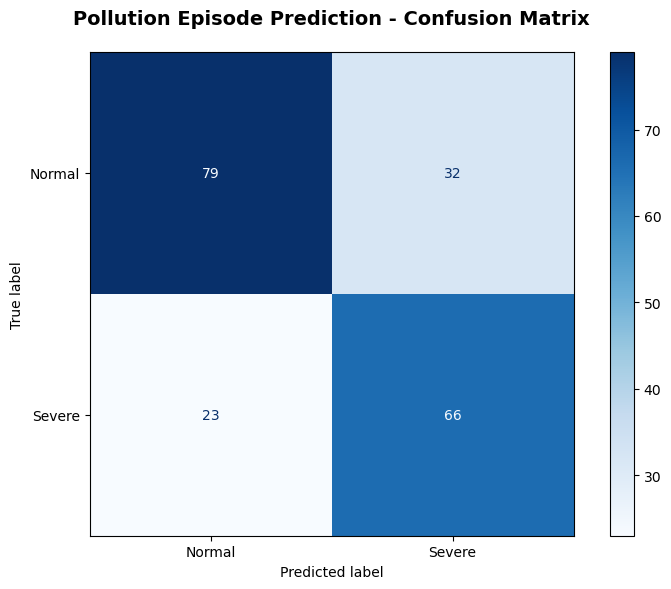

In [24]:
# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['Normal', 'Severe'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Pollution Episode Prediction - Confusion Matrix', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [25]:
# Analyze predictions by city
city_analysis = results_df.groupby('city').agg({
    'severe_episode': ['sum', 'count'],
    'predicted': 'sum',
    'correct': 'mean'
}).round(3)

city_analysis.columns = ['Actual_Severe', 'Total_Samples', 'Predicted_Severe', 'Accuracy']
city_analysis['Actual_Normal'] = city_analysis['Total_Samples'] - city_analysis['Actual_Severe']
city_analysis['Predicted_Normal'] = city_analysis['Total_Samples'] - city_analysis['Predicted_Severe']
city_analysis = city_analysis[['Total_Samples', 'Actual_Severe', 'Predicted_Severe', 'Accuracy']]
city_analysis['Accuracy'] = (city_analysis['Accuracy'] * 100).round(1).astype(str) + '%'

print("🏙️  CITY-WISE PREDICTION ANALYSIS")
print("="*70)
print(city_analysis.to_string())
print("="*70)


🏙️  CITY-WISE PREDICTION ANALYSIS
            Total_Samples  Actual_Severe  Predicted_Severe Accuracy
city                                                               
Amritsar               28             16                18    71.4%
Chandigarh             29             13                13    72.4%
Delhi                  29             17                13    72.4%
Gurugram               28             12                13    67.9%
Jaipur                 28              9                11    78.6%
Lucknow                29              9                14    75.9%
Patna                  29             13                16    69.0%


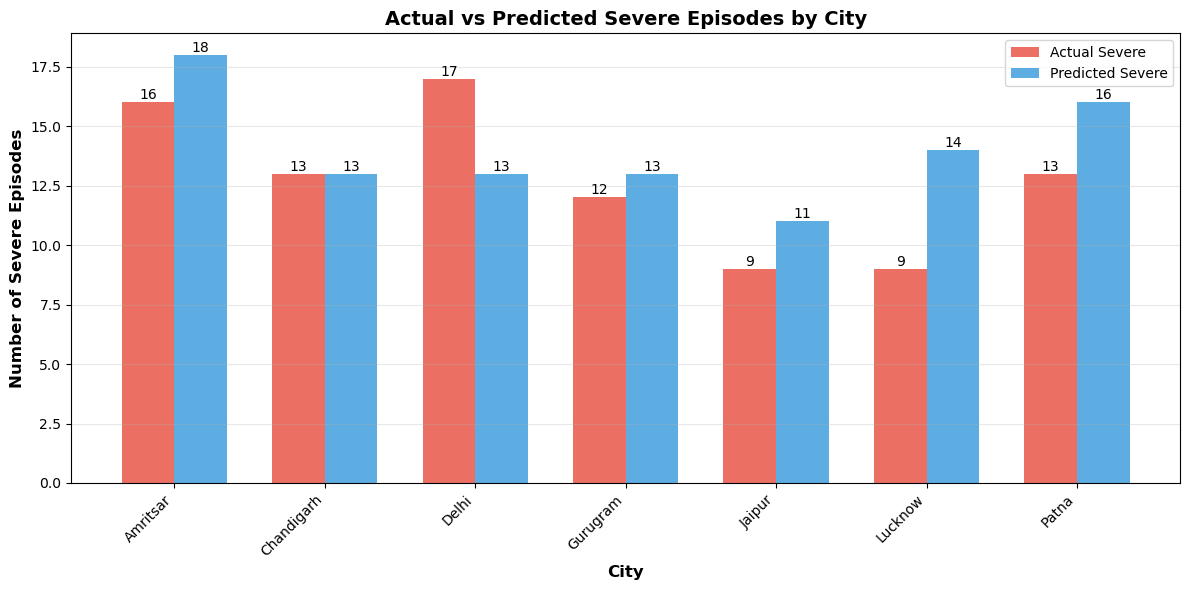

In [26]:
# Visualize city-wise predictions
city_data = results_df.groupby('city').agg({
    'severe_episode': 'sum',
    'predicted': 'sum'
}).reset_index()

x = np.arange(len(city_data))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, city_data['severe_episode'], width, 
               label='Actual Severe', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, city_data['predicted'], width, 
               label='Predicted Severe', color='#3498db', alpha=0.8)

ax.set_xlabel('City', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Severe Episodes', fontsize=12, fontweight='bold')
ax.set_title('Actual vs Predicted Severe Episodes by City', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(city_data['city'], rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [27]:
# Show high-confidence severe episode predictions
high_conf_severe = results_df[results_df['probability_severe'] >= 0.7].sort_values(
    'probability_severe', ascending=False)

print("⚠️  HIGH-CONFIDENCE SEVERE EPISODE PREDICTIONS (Probability ≥ 70%)")
print("="*100)
if len(high_conf_severe) > 0:
    display_cols = ['record_id', 'city', 'date', 'temperature_c', 'fire_count_punjab',
                    'previous_day_aqi', 'actual_label', 'prediction_label', 'probability_severe']
    print(high_conf_severe[display_cols].head(15).to_string(index=False))
    print(f"\n📊 Total high-confidence severe predictions: {len(high_conf_severe)}")
else:
    print("No predictions with probability ≥ 70%")
print("="*100)


⚠️  HIGH-CONFIDENCE SEVERE EPISODE PREDICTIONS (Probability ≥ 70%)
 record_id       city       date  temperature_c  fire_count_punjab  previous_day_aqi actual_label prediction_label  probability_severe
       199   Amritsar 2022-01-16            5.2                100                65       Normal           Severe            0.904762
        64      Delhi 2020-01-17           14.8                 15               272       Severe           Severe            0.904762
       116   Gurugram 2023-01-27            8.5                 29               182       Severe           Severe            0.904762
       112      Delhi 2023-02-15            6.2                132               308       Severe           Severe            0.904762
       108      Patna 2023-11-15           12.2                602               162       Severe           Severe            0.904762
       100   Gurugram 2022-01-18           10.7                 50               306       Severe           Severe         

In [28]:
# Analyze false negatives (missed severe episodes - CRITICAL)
false_negatives = results_df[(results_df['severe_episode'] == 1) & 
                              (results_df['predicted'] == 0)]

print("❌ FALSE NEGATIVES - Missed Severe Episodes (Critical Errors)")
print("="*100)
print(f"\n⚠️  {len(false_negatives)} severe episodes were missed by the model!")
print("\nThese are dangerous situations where the model failed to warn:\n")
display_cols = ['record_id', 'city', 'date', 'temperature_c', 'wind_speed_kmh',
                'fire_count_punjab', 'previous_day_aqi', 'probability_severe']
print(false_negatives[display_cols].head(10).to_string(index=False))
print("="*100)


❌ FALSE NEGATIVES - Missed Severe Episodes (Critical Errors)

⚠️  23 severe episodes were missed by the model!

These are dangerous situations where the model failed to warn:

 record_id       city       date  temperature_c  wind_speed_kmh  fire_count_punjab  previous_day_aqi  probability_severe
         6 Chandigarh 2021-11-05           15.1            14.9                919               287            0.388889
         9   Amritsar 2022-01-15           17.1             8.9                 31               137            0.375000
        12   Amritsar 2020-11-20           13.2             9.0                259                94            0.000000
        26      Patna 2021-10-27           31.0             8.8               1424               223            0.388889
        27      Patna 2021-01-09           17.5             9.0                 88               341            0.388889
        37   Gurugram 2019-12-26           25.0            22.4                112               1

In [29]:
# Analyze false positives (false alarms)
false_positives = results_df[(results_df['severe_episode'] == 0) & 
                              (results_df['predicted'] == 1)]

print("⚡ FALSE POSITIVES - False Alarms")
print("="*100)
print(f"\n📢 {len(false_positives)} normal days were incorrectly flagged as severe.")
print("\nThese false alarms may cause unnecessary public concern:\n")
display_cols = ['record_id', 'city', 'date', 'temperature_c', 'wind_speed_kmh',
                'fire_count_punjab', 'previous_day_aqi', 'probability_severe']
print(false_positives[display_cols].head(10).to_string(index=False))
print("="*100)


⚡ FALSE POSITIVES - False Alarms

📢 32 normal days were incorrectly flagged as severe.

These false alarms may cause unnecessary public concern:

 record_id     city       date  temperature_c  wind_speed_kmh  fire_count_punjab  previous_day_aqi  probability_severe
         4   Jaipur 2022-01-09            9.8            16.0                 80               343            0.833333
         5 Gurugram 2021-02-24           12.8            15.5                 84               336            0.833333
         7    Patna 2021-02-19           23.3             1.0                110               359            0.521739
        14    Patna 2022-02-03           25.9             1.0                126               306            0.521739
        25    Patna 2022-02-14           20.2             4.5                 93               152            0.521739
        28    Patna 2023-10-09           32.9             4.0                484               196            0.521739
        31    Delhi 2

📊 FEATURE IMPORTANCE RANKING

Top features driving predictions:

   wind_direction_deg           0.2454 ████████████
   weather_dispersion_index     0.2268 ███████████
   temperature_c                0.1757 ████████
   pollution_momentum           0.1488 ███████
   wind_speed_kmh               0.1154 █████
   previous_day_aqi             0.0880 ████
   month                        0.0000 
   humidity_pct                 0.0000 
   fire_count_punjab            0.0000 
   fire_count_haryana           0.0000 


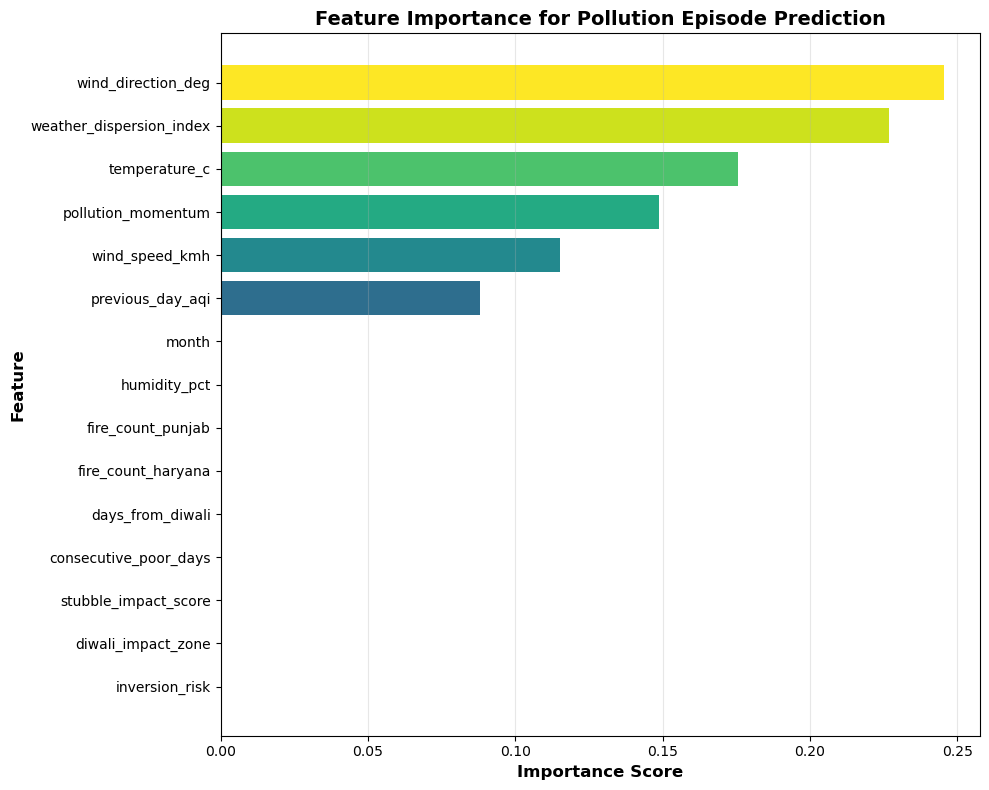

In [30]:
# Extract and display feature importance from the model
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': FEATURE_NAMES,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("📊 FEATURE IMPORTANCE RANKING")
    print("="*60)
    print("\nTop features driving predictions:\n")
    for i, row in feature_importance.head(10).iterrows():
        bar = '█' * int(row['Importance'] * 50)
        print(f"   {row['Feature']:28s} {row['Importance']:.4f} {bar}")
    print("="*60)
    
    # Visualize feature importance
    plt.figure(figsize=(10, 8))
    colors = plt.cm.viridis(feature_importance['Importance'] / feature_importance['Importance'].max())
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance for Pollution Episode Prediction', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model type.")


In [31]:
# Calculate key metrics for summary
total_samples = len(y_actual)
correct_predictions = (y_actual == y_pred).sum()
accuracy = correct_predictions / total_samples

# Severe episode metrics
actual_severe = (y_actual == 1).sum()
predicted_severe = (y_pred == 1).sum()
true_positives = ((y_actual == 1) & (y_pred == 1)).sum()
false_negatives = ((y_actual == 1) & (y_pred == 0)).sum()
false_positives = ((y_actual == 0) & (y_pred == 1)).sum()

recall = true_positives / actual_severe if actual_severe > 0 else 0
precision = true_positives / predicted_severe if predicted_severe > 0 else 0

print("="*70)
print("                    📊 PREDICTION DEMO SUMMARY")
print("="*70)

print("\n┌" + "─"*68 + "┐")
print("│" + " MODEL INFORMATION".ljust(68) + "│")
print("├" + "─"*68 + "┤")
print(f"│  Model Type: Tuned Decision Tree Classifier".ljust(69) + "│")
print(f"│  Features Used: {len(FEATURE_NAMES)} predictive features".ljust(69) + "│")
print(f"│  Dataset: {total_samples} samples from 7 North Indian cities".ljust(69) + "│")
print("└" + "─"*68 + "┘")

print("\n┌" + "─"*68 + "┐")
print("│" + " PREDICTION RESULTS".ljust(68) + "│")
print("├" + "─"*68 + "┤")
print(f"│  Total Predictions Made: {total_samples}".ljust(69) + "│")
print(f"│  Correct Predictions: {correct_predictions} ({accuracy:.1%})".ljust(69) + "│")
print(f"│  Predicted Severe Episodes: {predicted_severe}".ljust(69) + "│")
print(f"│  Actual Severe Episodes: {actual_severe}".ljust(69) + "│")
print("└" + "─"*68 + "┘")

print("\n┌" + "─"*68 + "┐")
print("│" + " CRITICAL METRICS (Severe Episode Detection)".ljust(68) + "│")
print("├" + "─"*68 + "┤")
print(f"│  ✅ True Positives (Correctly detected): {true_positives}".ljust(69) + "│")
print(f"│  ❌ False Negatives (Missed severe): {false_negatives}".ljust(69) + "│")
print(f"│  ⚡ False Positives (False alarms): {false_positives}".ljust(69) + "│")
print(f"│  📈 Recall (Detection Rate): {recall:.1%}".ljust(69) + "│")
print(f"│  📊 Precision: {precision:.1%}".ljust(69) + "│")
print("└" + "─"*68 + "┘")

print("\n" + "="*70)


                    📊 PREDICTION DEMO SUMMARY

┌────────────────────────────────────────────────────────────────────┐
│ MODEL INFORMATION                                                  │
├────────────────────────────────────────────────────────────────────┤
│  Model Type: Tuned Decision Tree Classifier                        │
│  Features Used: 15 predictive features                             │
│  Dataset: 200 samples from 7 North Indian cities                   │
└────────────────────────────────────────────────────────────────────┘

┌────────────────────────────────────────────────────────────────────┐
│ PREDICTION RESULTS                                                 │
├────────────────────────────────────────────────────────────────────┤
│  Total Predictions Made: 200                                       │
│  Correct Predictions: 145 (72.5%)                                  │
│  Predicted Severe Episodes: 98                                     │
│  Actual Severe Episodes: 89